In [1]:
import numpy as np
import astropy
import ccdproc
from ccdproc import CCDData, Combiner
from astropy import units as u
from astropy.visualization import SqrtStretch
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
from photutils import centroid_com, centroid_1dg, centroid_2dg
from photutils import CircularAperture
from photutils import aperture_photometry
from photutils import Background2D
from photutils import MedianBackground
from scipy.ndimage import shift
import gc                                                           
gc.enable()

C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_6860\1974830583.py:9: DeprecationWarning: `photutils.centroid_com` is a deprecated alias for `photutils.centroids.centroid_com`. Instead, please use `from photutils.centroids import centroid_com` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg
C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_6860\1974830583.py:9: DeprecationWarning: `photutils.centroid_1dg` is a deprecated alias for `photutils.centroids.centroid_1dg`. Instead, please use `from photutils.centroids import centroid_1dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg
C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_6860\1974830583.py:9: DeprecationWarning: `photutils.centroid_2dg` is a deprecated alias for `photutils.centroids.centroid_2dg`. Instead, please use `from photutils.centroids import centroid_2dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid

In [2]:
# Loading in the Bias images
images = ccdproc.ImageFileCollection(".",glob_include='Bias_000021*')
biases = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 2)]

Set OBSGEO-Y to  2879792.379 from OBSGEO-[LBH].
Set OBSGEO-Z to -3897419.410 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2879792.379 from OBSGEO-[LBH].
Set OBSGEO-Z to -3897419.410 from OBSGEO-[LBH]'.


In [3]:
# Finsing the statisticsof the first bias frame

print('Min:', np.min(biases[0]))
print('Max:', np.max(biases[0]))
print('Median:', np.median(biases[0]))
print('Std Dev:', np.std(biases[0]))

Min: 1848
Max: 2353
Median: 2028.0
Std Dev: 43.34168669443131


The statistics show that were a lot of hot pixels in the images and that there were a lot of photons coming in that have to be acounted for in the science images

In [4]:
# Showing the medians of all the biase frames and the standard deviations of those frame medians. 
# We did this to see that every frame was usable

a = len(biases)

bias_medians = []

for i in range(1,a):
    bias_medians.append(np.median(biases[i]))

print(bias_medians)
print('Std Dev:', np.std(bias_medians))

[2030.0, 2030.0, 2030.0, 2030.0, 2029.0, 2029.0, 2029.0, 2029.0, 2029.0, 2028.0, 2028.0, 2029.0, 2029.0, 2029.0, 2029.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2027.0, 2027.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2028.0, 2027.0, 2027.0, 2027.0, 2028.0, 2027.0, 2027.0, 2027.0, 2027.0, 2027.0, 2027.0]
Std Dev: 0.9483713850721502


In [5]:
bias_median = ccdproc.Combiner(biases, dtype=np.float32).median_combine() #Creating a bias median image

# A good habit to get into is printing the statistics of input and output images
print('Image statistics for the median bias')

#Printing basic values for the median bias image
thisimage=bias_median
print('Min:', np.min(thisimage))
print('Max:', np.max(thisimage))
print('Median:', np.median(thisimage))
print('Std Dev:', np.std(thisimage))

Image statistics for the median bias
Min: 1978.0
Max: 2193.5
Median: 2023.5
Std Dev: 23.87246322631836


C:\Users\Msi Raider\anaconda3\envs\obsastro2022\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


The reduction in the standard deviation shows that the image has become a much more uniform image. This can also be seen as the min is larger and the max is maller than before.

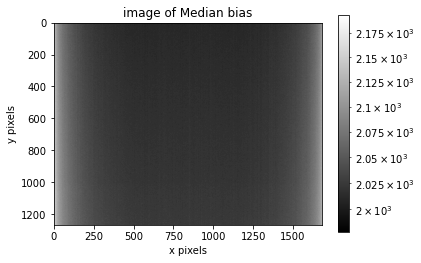

In [6]:
#Showing the image
plt.imshow(bias_median, cmap='gray', norm=LogNorm(vmin=None, vmax=None, clip=False))
plt.xlabel("x pixels")
plt.ylabel("y pixels")
plt.title("image of Median bias")
plt.colorbar()

In [7]:
print(bias_median.header)

OrderedDict([('NCOMBINE', 40)])


In [8]:
bias_median.write("bias_median.fits")
# Writting the new bias frame

In [9]:
del(biases) #Deletes the biases object that was created before
collected = gc.collect() #Clears kernel memory
print('Check garbage collection', collected)

Check garbage collection 6133
